# Response Themes for "What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?"

* Goal: Extract theme keywords from `hinderances` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Strawman process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [3]:
rs = np.random.RandomState(123)

In [4]:
pd.set_option('max_colwidth', 1000)

In [5]:
df = pd.read_csv('survey_short_columns.csv')

In [6]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

For later ref, to keep the notebook code generic for other questions.

In [7]:
column = 'hinderances'

In [8]:
responses = df['hinderances']

In [9]:
responses.isnull().value_counts()

True     943
False    763
Name: hinderances, dtype: int64

In [10]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 6 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [11]:
show(responses.sample(20, random_state=rs))

0) Jupyter Notebook "Windows 7+" experience is inferior to Linux one

1) Integration with text editor 

2) Version control (and, which is related, collaborative version control).

3) Doesn't seem to fit with building a large project, prefer IDE

4) remembering how to get it setup

5) better connections to external DBs, easier interact widgets.

6) Primarily use R, Rstudio is better for R.

7) * a "clear and run all" button to get rid of variable persistence (possible with Kernel > Clear all then run but that's more clicks) * a IPython notebook .app -- it'd be really nice to double click on a notebook and have it open

8) School assignments

9) In ML, I have a cell output the loss at each epoch or few thousand iterations. This makes the output really long and to go between cells I have to scroll a lot to get past the wall of text I made.

10) The notebook workflows are very linear, doing experiments is difficult. Also some source control/diff tool would be really nice.

11) - Better edi

In [12]:
themes = {
    'version' : ['version control', 'diff', 'source control', 'git'],
    'collab': ['shar(e|ing)', 'collab'],
    'development' : ['text editor', 'ide(\W|$)', 'vim', 'emacs', 'editing',
                     'key binding', 'key mapping', 'keyboard', 'shortcuts',
                     'debug', 'programming', 'widgets', 'view', 'interact', 
                     'dataframes', 'ui', 'design', 'linear', 'search', 'theme', 
                     'collapse',  'organization', 'proliferation', 'cut', 
                     'merge', 'completion', 'aesthetic', 'scroll'],
    'setup' : ['setup', 'desktop', 'install', 'documentation', 'kernels', 
               'customization', 'windows'],
    'integrations' : ['connections', 'db', 'rstudio'],
    'language': ['clojure', 'scala', 'c#', 'r(\W|$)'],
    'disseminate' : ['publication', 'export', 
                     'deploy', 'authoring', 'dashboard', 'latex', 'slides'],
    'reuse': ['reuse', 'module', 'cron'],
    'robust' : ['stability', 'crash', 'reload', 'bug', 'reliability', 
                'windows', 'ipad', 'slow', 'performance']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes in order to improve coverage.

In [13]:
import re

In [14]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [15]:
def tag_themes(responses, themes):
    tagged = responses.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = responses.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [16]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

disseminate 48
robust 44
reuse 30
integrations 16
language 23
collab 55
version 139
setup 89
development 275


1    294
0    286
2    138
3     31
4     14
Name: themes, dtype: int64

In [17]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,hinderances,themes
1192,I prefer Juliabox which I don't need to administer and is in the cloud.,
1359,Some things just work more efficiently for me to script directly in Python.,
885,I don't need it more often,
196,I use it for hobby projects and only rarely at work. For scientific hobby prokects I use it extensively.,
1253,I use it heavily to do exploratory data analysis. I conduct trainings often & feel Jupyter is the best way to do it.,
956,Better integration with batch-based computing clusters,
1384,"Nothing really, it's already pretty frequent.",
542,The requirement for sequential execution of cells and no concepts of 'modulazation' (call cell x in notebook y) means it is always somewhat cumbersome to use if you are doing anything complicated. But mostly the reluctance of others to use it.,
824,Multiple checkpoints for notebooks,
1474,Lack of proper equation numbering and referencing (same for table of contents etc).,


In [18]:
themes = {
 'collab': ['concurrent', 'multi-?user', 'shar(e|ing)', 'simultaneous', 'collab'],
 'development': ['visualization', 'applications', 'develop', 'design',
    'format', 'development', 'polyglot', 'key mapping', 'data creat', 'programming',
    'completion', 'variable', 'test', 'proliferation', 'linear', 'literate', 'key binding',
    'scroll', 'theme', 'integrat(ing|ion)', 'filing', 'packages', 'parallel',
    'view', 'plot', 'vim', 'data entry', 'edit(ing|or)', 'debug', 'ui', 'search',
    'organization', 'lint', 'cut', 'browse', 'intellisense', 'spell check',  
    'shortcuts', 'ide(\W|$)', 'diagram', 'script', 'compiler', 'dataframes', 'graphic',
    'input', 'complet(e|ion)', 'project', 'merge', 'keyboard', 'branch',
    'aesthetic', 'visual', 'collapse', 'widgets', 'emacs', 'interact', 'organi(s|z)',
    'refactor', 'workspace', 'notes', 'clutter', 'interface', 'understand'],
 'disseminate': ['distribution', 'gui', 'authoring', 'writing', 'story', 'textbook', 
    'deploy', 'standalone', 'books', 'manuscript', 'paper', 'send', 'web', 'publi(sh|cation)',
    'product(ion|i(s|z)ation)', 'app(s|lication)', 'push', 'present', 'export', 'blog', 'embed',
    'report', 'pages', 'latex', 'bundle', 'dashboard', 'publication', 'bibliograph',
    'citation', 'slides', 'document', 'business', 'documents', 'transition'],
 'integrations': ['spark', 'db', 'connections', 'd3', 'rstudio', 'fenics', 'sas', 'conda',
    'native', 'pentadactyl', 'sheets', 'in-house', 'django', 'ubuntu', 'excel'],
 'language': ['sage', 'c#', 'scala', 'perl', 'clojure', 'haskell', 'sql', 'julia',
    'r($|\W)', 'matlab', 'fortran', 'c\+\+', 'r(\W|$)', 'ruby', 'javascript'],
 'reuse': ['modul(e|ar)', 'parameter', 'complicate', 'reuse', 'package', 'cron', 'large',
    'schedule', 'maintain', 'serious', 'long', 'automat(e|ing|ion)', 'reus(e|able)', 'portab',
    'manag(e|ing)', 'librar(y|ies)', 'repeat', 'reproduc', 'complex', 'clean', 'DRY',
    'batch'],
 'robust': ['bug', 'reliability', 'performance', 'ipad', 'stability', 'speed', 'slow',
    'error', 'windows', 'crash', 'reload'],
 'setup': ['hosted', 'startup', 'environ', 'customization', 'documentation', 'install',
    'setup', 'customi(s|z)', 'backup', 'kernels', 'storage', 'theme', 'provision', 'config',
    'turn-key', 'server', 'cost', 'access', 'mobile', 'desktop', 'windows', 'state'],
 'version': ['history', 'hg', 'diff(\W|$)', 'provenance', 'vcs', 'git', 'tracking', 'version',
    'change ?log'],
 'external' : ['legacy', 'acceptance', 'compliance', 'adoption', 'habit', 'relevant'
    'nobody', 'policy', 'inertia', 'team', 'people', 'colleague'],
 'nothing': ['nothing', 'no need']
}

## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [19]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

external 35
disseminate 146
nothing 33
robust 51
reuse 136
integrations 43
language 58
collab 63
version 116
setup 148
development 425


1    308
2    220
0     94
3     88
4     31
5     14
6      8
Name: themes, dtype: int64

In [20]:
from IPython.display import display, clear_output

I've commented out this code so that the notebook re-runs top to bottom without getting stuck at this interactive prompt. Uncomment it if you want to poke through samples of the tagged responses.

In [21]:
# for key in themes:
#     clear_output()
#     display(tagged[tagged.themes.str.contains(key)].sample(10))
#     if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
#         break

## Keyword Frequencies

In [22]:
import matplotlib
import seaborn

In [23]:
counts = {}

In [24]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [25]:
hist = pd.Series(counts).sort_values()

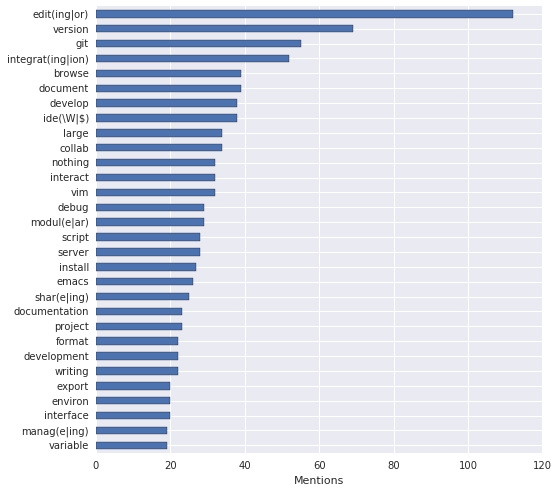

In [26]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Topic Model

The manual tagging above is but one way of breaking down the responses into themes. I wanted to try another approach as validation. So I experimented with LSA and clustering to see how they would group responses.

After searching over the number of topics and clusters, I do see some themes like "version control" and "text editing" emerge. With nearly all settings, some large clusters remain that seem to be a grab bag of topics.

Prerequisites:

* gemsim 0.12.2

In [27]:
import gensim
import string
import requests

In [28]:
texts = gensim.parsing.preprocess_documents(responses)

In [29]:
dictionary = gensim.corpora.Dictionary(texts)

In [30]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [31]:
tfidf = gensim.models.TfidfModel(corpus)

In [32]:
corpus_tfidf = tfidf[corpus]

In [33]:
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, DBSCAN
from gensim.matutils import corpus2csc

I informally experimented with the topic and cluster counts for quite some time, looking at the inertia graph and the resulting cluster sizes.

In [34]:
# set the number of clusters, must be >=1
topics_n = 10
clusters_n = 10

In [35]:
import matplotlib.pyplot as plt
import math

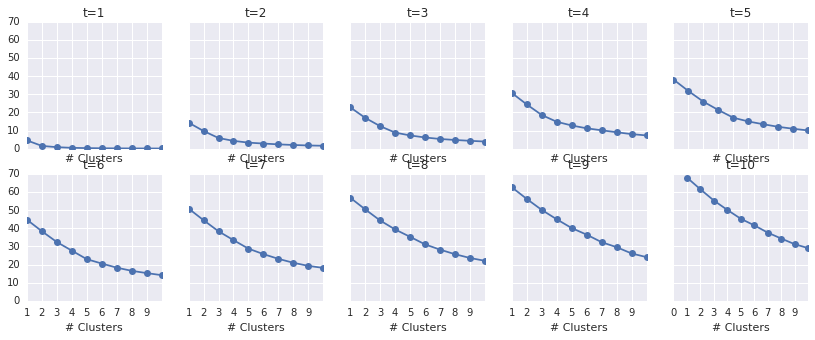

In [36]:
fig, axes = plt.subplots(math.ceil(topics_n / 5), 5, sharex=True, sharey=True, figsize=(14, 5))

for t in range(1, topics_n+1):
    inertia = [np.NaN]
    lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=t)
    corpus_lsi = lsi[corpus_tfidf]
    X = corpus2csc(corpus_lsi).transpose()
    
    for k in range(1,clusters_n+1):
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
#         print('k = %d, inertia= %f' % (k, k_means.inertia_ ))
        inertia.append(k_means.inertia_)

    ax = axes[(t-1) // 5][(t-1) % 5]
    ax.plot(inertia, '-o')
    ax.set_xticks(range(clusters_n))
    ax.set_title('t=%d' % t)
#     ax.set_ylabel('Inertia')
    ax.set_xlabel('# Clusters')

Here's 4 topics, 10 clusters.

In [37]:
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=4)
corpus_lsi = lsi[corpus_tfidf]
X = corpus2csc(corpus_lsi).transpose()
k_means = KMeans(n_clusters=10, random_state=np.random.RandomState(123))
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto',
    random_state=<mtrand.RandomState object at 0x7f39709edb70>, tol=0.0001,
    verbose=0)

In [38]:
clusters = pd.Series(k_means.labels_, index=responses.index)
clusters.value_counts()

7    285
4    138
8    108
1     83
0     61
3     29
9     19
6     15
5     13
2     12
dtype: int64

In [39]:
tagged['cluster'] = clusters

Cluster 8 is about IDEs and development environments, for example.

In [40]:
tagged[tagged.cluster == 8].head(10)

,hinderances,themes,cluster
8,Mainly two missing features: 1. Collapsable sections 2. Multi-cell selection / copy-cut-paste,"development,",8
16,"It is very easy to do exploratory computing, but not so easy to persist results. I work in computational quantum physics, and in my ""old"" workflows, e.g., with Fortran codes, the computation and analysis were usually well-separated: The results from (potentially long-running) simulations were saved as text files, and then analyzed/plotted with, e.g., gnuplot. Jupyter Notebook makes this more convenient by allowing me combine simulation and analysis in a single notebook without the intermediate step of saving text files and reading the data again. However, this also makes it much easier to ""lose"" results that only ever existed as data, but were not written to files. Going back to writing text files for all of the possibly interesting output would be a step back regarding the interactivity, so an easy way to save program state or something similar would be great. I realize this is not directly within the scope of the Jupyter Notebook, as it corresponds to a general persistence solut...","disseminate,reuse,language,setup,development,",8
22,"Poor experience opening notebooks in arbitrary locations, e.g., not in the /home tree, as there's no ""double-click file to start jupyter notebook"" feature (yet, I'm hoping)",,8
48,Ability to easily move library code from notebooks to modules.,"reuse,",8
53,"""cognitive load"" of having too many steps: start ""ipython notebook"" (in a particular directory, which then almost uselessly takes over that terminal session), find the right notebook, start it up. I imagine that for most users the server is usually irrelevant. Why can't I just open/start a notebook? (Note on Q3, below: do you really mean ""Jupyter notebook"" only, or ""ipython"", too? I am answering for the latter.","setup,",8
63,"Awkwardness in use cf. regular desktop editors - e.g. basic shortcuts for running a cell and making a new one vs. making a markdown one Difficulty with installing (vast majority of) add-ons etc, no standardised way just getting off repos on GitHub and debugging the frequent errors (e.g. recently had to look in issues log of repo for how to install nbextensions properly when readme didnt guide right; rpy2 update changed the guidance on how to install and did not work so after a few hours I gave up trying to get R inside Python kernel NB; xonsh kernel did not work with the latest Jupyter version). I really like Jupyter and do my best to contribute with these issues when they come up but it feels rather in development still (which is totally fine but not great for my productivity) ...also the fact that I'm fairly new to using Jupyter NBs probably holds me back :-)","disseminate,robust,language,version,setup,development,",8
72,I use the notebook for prototyping python code. I would love the ability to live-edit a module in one cell and interact with it in others.,"reuse,development,",8
81,"The one dimensional interface. It seems designed to be a single document rather than an complete interface. If you think about other powerful and ubiquitous software platforms, like Adobe Illustrator or Matlab, they often are designed around panels that expose useful information or interaction. For example, an editor, variable browser, command line, etc. I wish there were also multiple views within the Jupyter Notebook.","disseminate,language,development,",8
96,already a part of my workflow. Being able to convert from notebook to script is very important but I wish I could just run my notebook in production mode.,"disseminate,development,",8
126,"Lack of a project view, inter-notebook copy/pasting of cells. Not being able to export a Notebook removing code cells but leaving outputs.","disseminate,development,",8


Clusters 4 and 9 are about version control.

In [41]:
tagged[tagged.cluster == 9].head(10)

,hinderances,themes,cluster
14,git integration,"version,development,",9
101,Integration with version control and production code,"disseminate,version,development,",9
143,"I strongly use version control, and the workflow of using the notebook with version control is odd.","version,",9
238,Integration in version control (git).,"version,development,",9
245,Easy integration with git,"version,development,",9
370,Fiddly version control integration,"version,development,",9
540,A missing version control system,"version,",9
1026,Good Git integration.,"version,development,",9
1048,"Version control (and, which is related, collaborative version control).","collab,version,",9
1342,"The lack of version control (tracking changes using git does not work well) My own knowledge about how to use functions in other notebooks, etc.","version,",9


Cluster 5, the largest cluster, does not have a single, clear topic.

In [42]:
tagged[tagged.cluster == 1].head(10)

,hinderances,themes,cluster
11,Browser becomes unresponsive when I start a too intensive computation. Poor integration with my preferred code editors (pycharm or vim).,"development,",1
23,"IDE capabilities: debugging UI, refactorings,...","development,",1
37,"I want Jupyter to act like a normal text editor app in which I can easily open files, without the hassle of starting it from the console in the right place. Simple double click opening for all ipynbs please","development,",1
43,"Give notebooks more editors/ide functionnality: easier file browsing, editing, serach and replace...","development,",1
52,Code editing is inferior to IDEs,"development,",1
119,"I prefer developing in a full IDE, like PyCharm.","development,",1
123,It doesn't work well with standard version control tools because one line of code doesn't correspond to one line in the notebook file It throws away 30 years of text editor development by replacing a real editor like vim or emacs with a HTML text area.,"version,development,",1
128,"Number one complaint I have had is the lack of find and replace, autocomplete, and other text-editor style tools. I understand this may not really be the point of jupyter nootbooks, but I find myself cutting code, pasting to a text editor, and pasting back in all the time. In my limited experience (could easily be wrong about this), it doesn't have great integration with virtualenv, so it's a bit of a headache to switch from one env to another and reconfigure jupyter. On the nitpick side, translation of magic commands to equivalent python commands would be amazing when exporting to a .py file.","disseminate,development,",1
134,"I prefer to use a real editor (vim, emacs) and a terminal for my Python scripts, not small boxes.","development,",1
142,moving between coding snippets in the notebook to making changes in another editor/ide.,"development,",1


## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [43]:
themes_df = tagged.themes.to_frame()

In [44]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [45]:
themes_df[column+'_keywords'] = ''

In [46]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [47]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

In [48]:
themes_df.head(5)

,hinderances_themes,hinderances_keywords
1,,
5,,
6,"setup,development","setup,server,access,search"
7,"disseminate,reuse,development","web,report,package,format,integrat(ing|ion),dataframes,input"
8,development,cut


We'll write a semi-colon separated file for easy of reading in other tools.

In [49]:
themes_df.to_csv(column + '_themes.csv', sep=';')

If we want to recover the same DataFrame later, we can use this code.

In [50]:
tmp = pd.read_csv(column + '_themes.csv', sep=';', index_col=0).fillna('')